# Data analysis

In [1]:
from scipy.stats import pearsonr, spearmanr
import pickle
import numpy as np
from collections import defaultdict, Counter

import analysis_utils
import plot_utils

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})


import seaborn as sns
sns.set_style("whitegrid")

### 1) Load datasets from BIN file

In [3]:
wes_title='wes2015'
aida_title='aida'
n3_title='n3'

titles=[aida_title, n3_title]

In [4]:
data_articles={}

for title in titles:
    with open('bin/%s.bin' % title, 'rb') as outfile:
        data_articles[title]=pickle.load(outfile)


### 2) Distribution of AIDA collections 

In [5]:

d=defaultdict(int)
for article in data_articles[aida_title]:
    d[article.collection]+=1
print(d)

d=defaultdict(int)
for article in data_articles[n3_title]:
    d[article.collection]+=1
print(d)

defaultdict(<class 'int'>, {'aidatrain': 946, 'aidatestb': 231, 'aidatesta': 216})
defaultdict(<class 'int'>, {'rss500': 500, 'reuters128': 128})


### 3) Get frequency distributions of forms and instances

In [6]:
all_articles=set()
for articles in data_articles.values():
    all_articles |= articles

In [7]:
len(all_articles)

2021

In [8]:
instances_cnt={}
forms_cnt={}
for title, articles in data_articles.items():
    instances_cnt[title], forms_cnt[title]=analysis_utils.get_mention_counts(articles)

all_cnt_instances, all_cnt_forms=analysis_utils.get_mention_counts(all_articles)
instances_cnt[aida_title].pop('--NME--', None)


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 4.1. of the paper</span>

**4.1. Linear plots **

In [9]:
save=True

aida


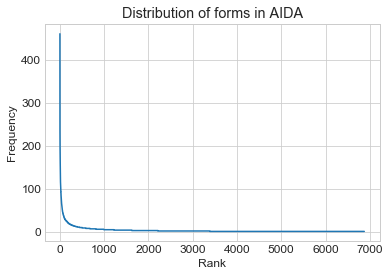

n3


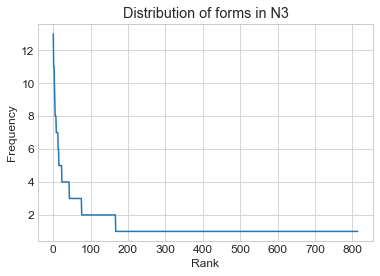

In [10]:
for title, data_forms_cnt in forms_cnt.items():
    print(title)
    plot_utils.plot_freq_dist(data_forms_cnt, 'forms in ' + title.upper(), 
                              x_axis='Rank', save=save)

**4.2. Log-log plots**

aida
n3


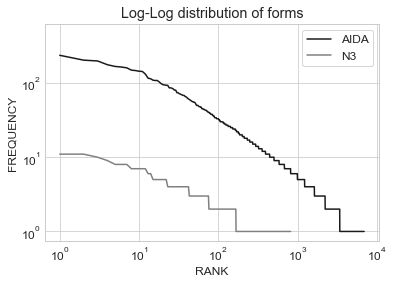

In [11]:
plot_utils.plot_multi_freq_dist(forms_cnt, kind='forms', 
                          x_axis='RANK', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [12]:
for title, data_forms_cnt in forms_cnt.items():
    print('Slope of %s' % title)
    print(analysis_utils.calculate_slope(data_forms_cnt))
    print()
print('ALL')
print(analysis_utils.calculate_slope(all_cnt_forms))

Slope of aida
LinregressResult(slope=-0.9085055184143714, intercept=7.8255514656094025, rvalue=-0.980230426304651, pvalue=0.0, stderr=0.002211666075089343)

Slope of n3
LinregressResult(slope=-0.4291157858478489, intercept=2.6598145891571967, rvalue=-0.9145065635986074, pvalue=9.4e-322, stderr=0.0066578990862902745)

ALL
LinregressResult(slope=-0.89150386214697, intercept=7.732402257777029, rvalue=-0.9793746816704233, pvalue=0.0, stderr=0.002117710734137212)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 4.1. of the paper</span>

**5.1. Linear plots **

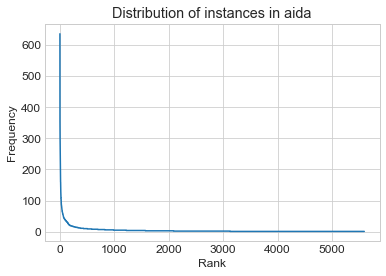

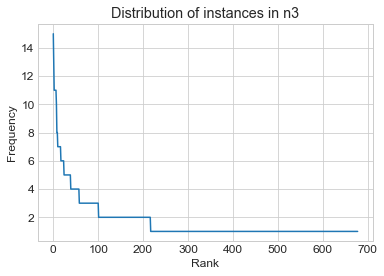

In [13]:
for title, data_instances_cnt in instances_cnt.items():
    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
                              x_axis='Rank', save=save)

**5.2. Log-log plots**

aida
n3


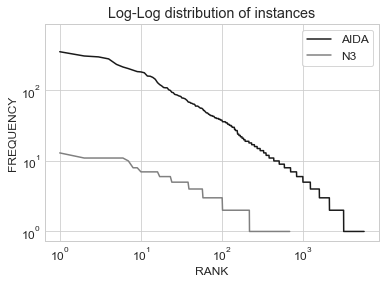

In [14]:
#for title, data_instances_cnt in instances_cnt.items():
#    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
#                              x_axis='Log(Rank)', loglog=True, 
#                              b=10, save=save)
    
plot_utils.plot_multi_freq_dist(instances_cnt, kind='instances', 
                              x_axis='RANK', loglog=True, 
                              b=10, save=save)

**5.3. Slope** 

In [15]:
for title, data_instances_cnt in instances_cnt.items():
    print('Slope of %s' % title)
    print(analysis_utils.calculate_slope(data_instances_cnt))
    print()
print('ALL')
print(analysis_utils.calculate_slope(all_cnt_instances))

Slope of aida
LinregressResult(slope=-0.9657417477440569, intercept=8.196237374207712, rvalue=-0.9817597280327227, pvalue=0.0, stderr=0.0025012217726795715)

Slope of n3
LinregressResult(slope=-0.5418946841833255, intercept=3.330739533590001, rvalue=-0.9503337969510662, pvalue=0.0, stderr=0.006820706078897001)

ALL
LinregressResult(slope=-0.9508303826500141, intercept=8.129758437316264, rvalue=-0.9818528987899069, pvalue=0.0, stderr=0.0023473874212897004)


### 6) PageRank distribution of instances

<span style="background-color:lightgreen">Section 4.2. of the paper</span>

#### 6.1. Obtain pagerank data

In [16]:
skip_zeros=True
pr_agg={}
pr_uniq={}
pageranks={}

for title, articles in data_articles.items():
    pr_agg[title], pr_uniq[title], this_pageranks=\
        analysis_utils.get_pageranks(articles, skip_zeros=skip_zeros)
    pageranks[title] = Counter(this_pageranks)


#### 6.2. Plot the PR distribution

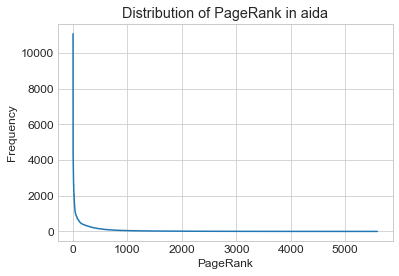

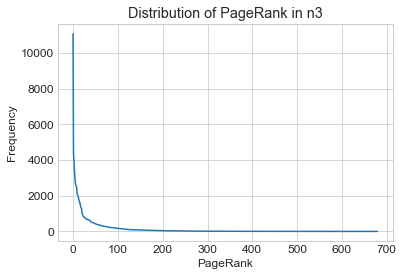

In [17]:
for title, pr in pageranks.items():
    plot_utils.plot_freq_dist(pr, 
                               title='PageRank in ' + title, 
                               x_axis='PageRank', save=True)

aida
n3


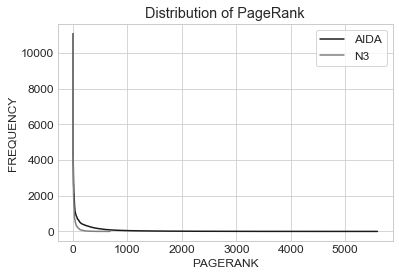

In [18]:
plot_utils.plot_multi_freq_dist(pageranks, 
                          kind='PageRank', 
                          x_axis='PAGERANK', save=True)

#### 6.3. Plot the PR distribution (log-log plot)

aida
n3


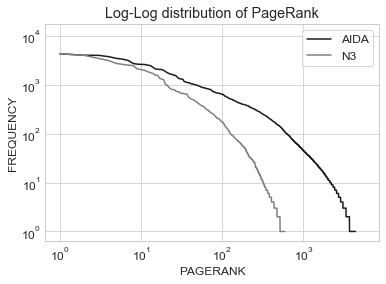

In [19]:
plot_utils.plot_multi_freq_dist(pageranks, kind='PageRank', 
                          x_axis='PAGERANK', loglog=True, 
                          b=10, save=save)

#### 6.4. Inspect individual pagerank

In [20]:
# United_States has a max pageRank of 11066. 
pr=11066
print(pr_agg[n3_title][pr], pr_agg[aida_title][pr], pr_uniq[aida_title][pr])


11 636 1


### 7) Prepare ambiguity and variance data

In [21]:
interpretations, references = analysis_utils.get_interpretations_and_references(all_articles, 
                                                                            skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 4.3. of the paper</span>

In [22]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'France': 5,
 'Greece': 1,
 'ATHENS': 1,
 'French': 2,
 'Alain Juppe': 1,
 'Greek': 1,
 'Costas Simitis': 1,
 'Theodoros Pangalos': 1,
 'Apple': 1,
 'Tim Cook': 1,
 'FRENCH': 2,
 'PARIS': 1,
 'Lens': 1,
 'Nantes': 1,
 'Paris St Germain': 1,
 'Nancy': 2,
 'NYC': 1,
 'Michigan National Bank': 1,
 'Detroit': 2,
 'CCA': 1,
 'LONDON': 1,
 'London': 4,
 'Notting Hill Carnival': 1,
 'Europe': 1,
 'Rio': 1,
 'Saudi Arabia': 1,
 'Pakistani': 2,
 'DUBAI': 1,
 'Saudi': 1,
 'Mecca': 1,
 'Frank Bruno': 1,
 'Britain': 2,
 'Sun': 1,
 'Bruno': 1,
 'Briton': 2,
 'Mike Tyson': 1,
 'American': 2,
 'Oliver McCall': 1,
 'Wembley': 2,
 'Tyson': 1,
 'Las Vegas': 1,
 'FERGUSON': 1,
 'SCOTTISH': 2,
 'GLASGOW': 1,
 'Everton': 1,
 'Duncan Ferguson': 1,
 'Manchester United': 1,
 'Scottish': 2,
 'Glasgow Rangers': 1,
 'Ally McCoist': 1,
 'World Cup': 12,
 'Austria': 4,
 'Vienna': 1,
 'Ferguson': 2,
 'Scotland': 5,
 'Craig Brown': 1,
 'Celtic': 1,
 'Jackie McNamara': 1,
 'NHL': 1,
 'GMT': 1,
 'NEW YORK': 4,
 'NBA'

In [23]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [24]:
agg_per_ambiguity

defaultdict(int, {1: 7037, 2: 381, 3: 84, 4: 29, 5: 10, 6: 3, 12: 1})

In [25]:
# Number of forms with ambiguity > 1
sum(i for j,i in agg_per_ambiguity.items() if j>1)

508

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 4.4. of the paper</span>

In [26]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'France': 5,
 'Greece': 4,
 'Athens': 2,
 'Alain_Juppé': 1,
 'Costas_Simitis': 2,
 'Theodoros_Pangalos': 1,
 'Apple_Inc.': 2,
 'Tim_Cook': 1,
 'Paris': 2,
 'RC_Lens': 2,
 'FC_Nantes': 1,
 'Paris_Saint-Germain_F.C.': 4,
 'AS_Nancy': 1,
 'New_York_City': 7,
 'Michigan_National_Bank': 1,
 'Detroit': 2,
 'Corrections_Corporation_of_America': 1,
 'London': 3,
 'Notting_Hill_Carnival': 1,
 'Europe': 5,
 'Rio_de_Janeiro': 3,
 'Saudi_Arabia': 3,
 'Pakistan': 3,
 'Dubai': 2,
 'Mecca': 1,
 'Frank_Bruno': 2,
 'United_Kingdom': 10,
 'The_Sun_(United_Kingdom)': 2,
 'Mike_Tyson': 2,
 'United_States': 11,
 'Oliver_McCall': 1,
 'Wembley_Arena': 1,
 'Las_Vegas': 1,
 'Duncan_Ferguson': 3,
 'Scotland_national_football_team': 4,
 'Glasgow': 1,
 'Everton_F.C.': 1,
 'Manchester_United_F.C.': 3,
 'Scotland': 3,
 'Rangers_F.C.': 2,
 'Ally_McCoist': 3,
 '1998_FIFA_World_Cup': 4,
 'Austria_national_football_team': 3,
 'Vienna': 2,
 'Craig_Brown': 1,
 'Celtic_F.C.': 2,
 'Jackie_McNamara': 1,
 'National_Hockey_L

In [27]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [28]:
agg_per_variance

defaultdict(int,
            {1: 4555,
             2: 1206,
             3: 247,
             4: 74,
             5: 22,
             6: 10,
             7: 6,
             10: 2,
             11: 1})

In [29]:
# Number of instances with variance > 1
sum(i for j,i in agg_per_variance.items() if j>1)

1568

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 4.5. of the paper</span>

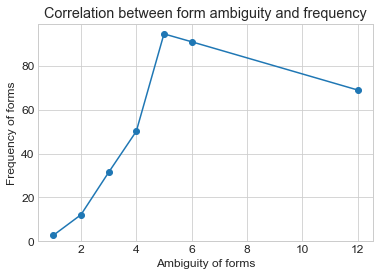

In [30]:
plot_utils.frequency_correlation(ambiguity, 
                                 all_cnt_forms, 
                                 title='Correlation between form ambiguity and frequency', 
                                 x_label='Ambiguity of forms', 
                                 y_label='Frequency of forms',
                                 save=save)

In [31]:
form_y_freq, form_x_amb = analysis_utils.prepare_lists(all_cnt_forms, ambiguity)

correlation, significance = spearmanr(form_x_amb,form_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.37723436836693475 . Significance:  8.905920383912834e-254


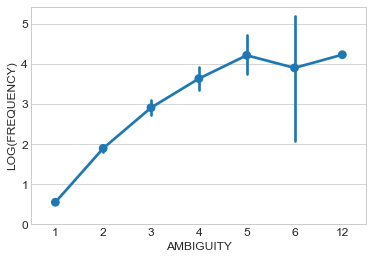

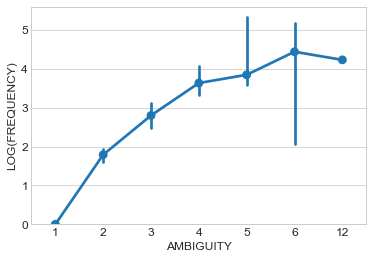

In [32]:
plot_utils.plot_line_with_whiskers(form_x_amb, np.log(form_y_freq),
                        xl='AMBIGUITY',
                        yl='LOG(FREQUENCY)',
#                        title='Correlation between form ambiguity and frequency',
                        title='correlation ambiguity frequency',
                        show_title=False,
                        save=save)

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 4.5. of the paper</span>

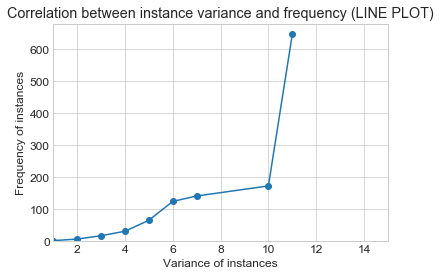

In [33]:
plot_utils.frequency_correlation(variance, 
                                 all_cnt_instances, 
                                 title='Correlation between instance variance and frequency (LINE PLOT)', 
                                 x_label='Variance of instances', 
                                 y_label='Frequency of instances',
                                 xlim=[1,15],
                                 save=save)

In [34]:
insta_y_freq, insta_x_var = analysis_utils.prepare_lists(all_cnt_instances, variance)

In [35]:
correlation, significance = spearmanr(insta_x_var, insta_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.6347768772094183 . Significance:  0.0


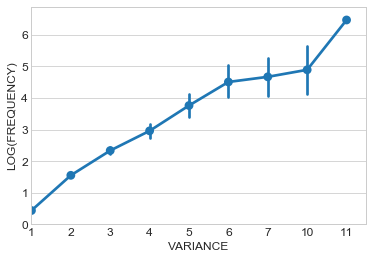

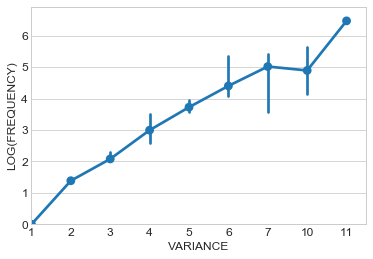

In [36]:
plot_utils.plot_line_with_whiskers(insta_x_var, np.log(insta_y_freq),
                        xl='VARIANCE',
                        yl='LOG(FREQUENCY)',
                        title='correlation variance frequency',
                        show_title=False,
                        xlim=[0,None],
                        save=save)

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 4.5. of the paper</span>

In [37]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

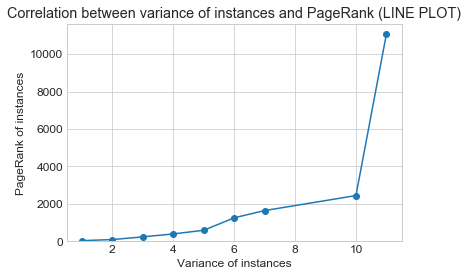

In [38]:
plot_utils.frequency_correlation(variance, 
                                 all_pr_instances, 
                                 title='Correlation between variance of instances and PageRank (LINE PLOT)',
                                 x_label='Variance of instances', 
                                 y_label='PageRank of instances',
                                 save=save)

In [39]:
insta_y_pr, insta_x_var2 = analysis_utils.prepare_lists(
    all_pr_instances, variance)

In [40]:
correlation, significance = spearmanr(insta_x_var2, insta_y_pr)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.25419570265687214 . Significance:  1.0746937212597496e-71


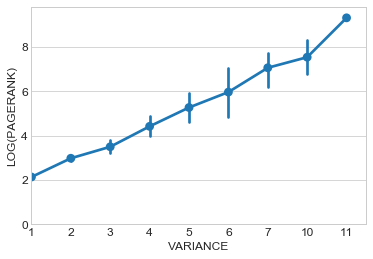

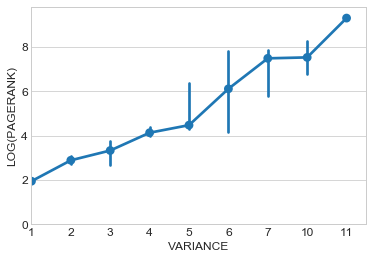

In [41]:
plot_utils.plot_line_with_whiskers(insta_x_var2, np.log(insta_y_pr),
                        xl='VARIANCE',
                        yl='LOG(PAGERANK)',
                        show_title=False,
                        title='correlation variance pagerank',
                        xlim=[0,None],
                        save=save)

### 13) Correlation between PageRank and frequency

<span style="background-color:lightgreen">Section 4.5. of the paper</span>

In [42]:
all_pr_instances

{'France': 4316,
 'Greece': 1069,
 'Athens': 490,
 'Alain_Juppé': 10,
 'Costas_Simitis': 3,
 'Apple_Inc.': 324,
 'Tim_Cook': 8,
 'Paris': 1354,
 'RC_Lens': 14,
 'FC_Nantes': 15,
 'Paris_Saint-Germain_F.C.': 33,
 'AS_Nancy': 10,
 'New_York_City': 2057,
 'Detroit': 345,
 'Corrections_Corporation_of_America': 4,
 'London': 2112,
 'Notting_Hill_Carnival': 9,
 'Europe': 1708,
 'Rio_de_Janeiro': 291,
 'Saudi_Arabia': 413,
 'Pakistan': 1041,
 'Dubai': 177,
 'Mecca': 162,
 'Frank_Bruno': 4,
 'United_Kingdom': 4008,
 'The_Sun_(United_Kingdom)': 53,
 'Mike_Tyson': 19,
 'United_States': 11066,
 'Wembley_Arena': 20,
 'Las_Vegas': 178,
 'Duncan_Ferguson': 2,
 'Scotland_national_football_team': 63,
 'Glasgow': 341,
 'Everton_F.C.': 85,
 'Manchester_United_F.C.': 149,
 'Scotland': 1333,
 'Rangers_F.C.': 71,
 'Ally_McCoist': 3,
 '1998_FIFA_World_Cup': 59,
 'Austria_national_football_team': 28,
 'Vienna': 561,
 'Celtic_F.C.': 75,
 'Jackie_McNamara': 1,
 'National_Hockey_League': 328,
 'Greenwich_Mean_T

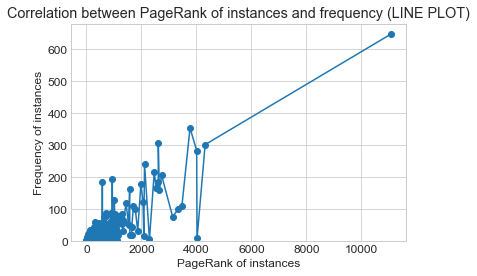

In [43]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

In [44]:
insta_x_pr_2, insta_y_freq2 = analysis_utils.prepare_lists(
    all_pr_instances, all_cnt_instances)

In [45]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.3281160272862797 . Significance:  6.565092084629179e-121


In [46]:
norm_x_pr = np.rint(np.log(insta_x_pr_2))
norm_x_pr
norm_y_freq=np.log(insta_y_freq2)

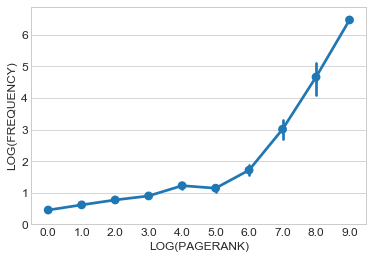

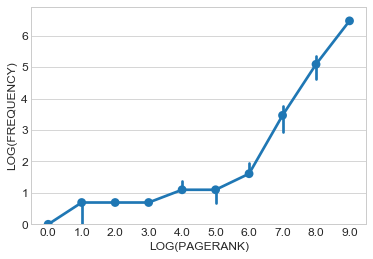

In [47]:
plot_utils.plot_line_with_whiskers(norm_x_pr, norm_y_freq,
                        xl='LOG(PAGERANK)',
                        yl='LOG(FREQUENCY)',
                        show_title=False,
                        title='correlation pagerank frequency',
                        save=save)

### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 4.6. of the paper</span>

In [48]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=analysis_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

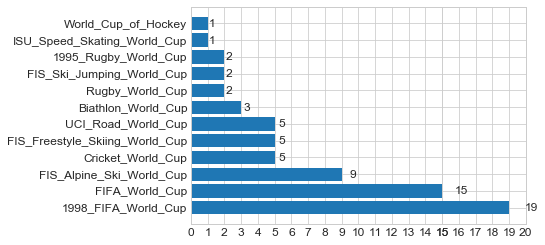

In [49]:
#fig = plt.figure()
fig, ax = plt.subplots()

br = ax.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18,19,20])

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_form_freq.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 4.6. of the paper</span>

In [50]:
form='World Cup' # this is the form with max ambiguity
import operator


ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

FIS_Ski_Jumping_World_Cup 	 9
FIFA_World_Cup 	 186
ISU_Speed_Skating_World_Cup 	 3
Biathlon_World_Cup 	 5
Rugby_World_Cup 	 52
Cricket_World_Cup 	 34
UCI_Road_World_Cup 	 4
1998_FIFA_World_Cup 	 59
World_Cup_of_Hockey 	 6
1995_Rugby_World_Cup 	 16
FIS_Alpine_Ski_World_Cup 	 21
FIS_Freestyle_Skiing_World_Cup 	 3


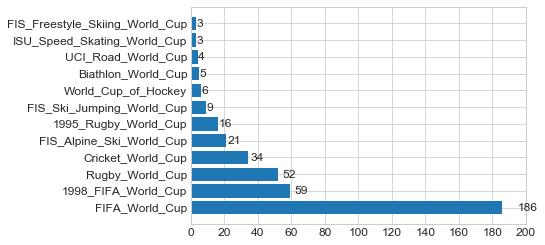

In [51]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])

plot_utils.autolabelh(br, ax)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

In [52]:
prs=[]
freqs=[]
labels=[]
for form2, pr in reversed(entries):
    for form, freq in insts:
        if form==form2:
            print(form, freq, pr)
            freqs.append(freq)
            prs.append(pr)
            labels.append(form)

FIS_Freestyle_Skiing_World_Cup 5 3
ISU_Speed_Skating_World_Cup 1 3
UCI_Road_World_Cup 5 4
Biathlon_World_Cup 3 5
World_Cup_of_Hockey 1 6
FIS_Ski_Jumping_World_Cup 2 9
1995_Rugby_World_Cup 2 16
FIS_Alpine_Ski_World_Cup 9 21
Cricket_World_Cup 5 34
Rugby_World_Cup 2 52
1998_FIFA_World_Cup 19 59
FIFA_World_Cup 15 186


In [53]:
correlation, significance = spearmanr(prs, freqs)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.5036097450903102 . Significance:  0.09507085530230283


### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 4.6. of the paper</span>

In [54]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=analysis_utils.get_instance_distribution(all_articles, instance)

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

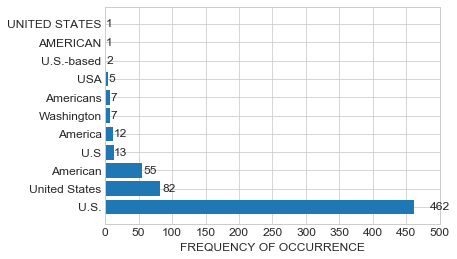

In [55]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500])
plt.xlabel('FREQUENCY OF OCCURRENCE')

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_insta_freq.png', bbox_inches='tight')